<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 2: Lending Club Loan Data Analysis

* * *

<img src="https://imprumut.md/wp-content/uploads/2022/07/tipuri-de-creditare-imprumut-md.jpg"/>

**DESCRIPTION**

Create a model that predicts whether or not a loan will be default using the historical data.


**Problem Statement**:

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Domain: Finance**

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

*Content*:

Dataset columns and definition:



*   *credit.policy*: 1 if the customer meets the credit underwriting criteria of


LendingClub.com, and 0 otherwise.

*   *purpose*: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

*   *int.rate*: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

*   *installment*: The monthly installments owed by the borrower if the loan is funded.

*   *log.annual.inc*: The natural log of the self-reported annual income of the borrower.

*   *dti*: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

*   *fico*: The FICO credit score of the borrower.

*   *days.with.cr.line*: The number of days the borrower has had a credit line.

*   *revol.bal*: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

*   *revol.util*: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

*   *inq.last.6mths*: The borrower's number of inquiries by creditors in the last 6 months.

*   *delinq.2yrs*: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

*   *pub.rec*: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



**Steps to perform:**

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

**Tasks:**

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

#Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from livelossplot import PlotLossesKerasTF

#Import library

In [ ]:
#Import the necessary library
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np


In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.layers import Flatten, Reshape
from tensorflow.keras import Model

In [ ]:
from sklearn.model_selection import train_test_split

#Data aquisition

In [ ]:
pd_df_loan_data = pd.read_csv('/content/loan_data.csv')

In [ ]:
#show first 5 records
pd_df_loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
pd_df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
pd_df_loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
pd_df_loan_data.describe(include=[object])

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


##Feature Transformation

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(pd_df_loan_data['purpose'])

LabelEncoder()

In [ ]:
le.classes_

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

In [ ]:
pd_df_loan_data['purpose'] = le.transform(pd_df_loan_data['purpose'])

In [ ]:
pd_df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [ ]:
pd_df_loan_data.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


##Exploratory data analysis of different factors of the dataset

In [ ]:
pd_df_loan_data['revol.bal_0'] = pd_df_loan_data['revol.bal']

In [ ]:
pd_df_loan_data['revol.bal'] = pd_df_loan_data['revol.bal'].apply(lambda a : a / 1000.)
pd_df_loan_data['revol.bal_0'] = pd_df_loan_data['revol.bal_0'].apply(lambda a : a / 1000000.)

In [ ]:
df_s_max_loan_data = pd_df_loan_data.max()

In [ ]:
def divMaxGreath_1(data, max_data):
  for feature in data.columns:
    if (max_data[feature] > 1.):
      data[feature] = data[feature] / max_data[feature]
    else:
      pass

In [ ]:
df_s_max_loan_data.max()

17639.95833

In [ ]:
divMaxGreath_1(pd_df_loan_data, df_s_max_loan_data)

In [ ]:
pd_df_loan_data.max()

credit.policy        1.0000
purpose              1.0000
int.rate             0.2164
installment          1.0000
log.annual.inc       1.0000
dti                  1.0000
fico                 1.0000
days.with.cr.line    1.0000
revol.bal            1.0000
revol.util           1.0000
inq.last.6mths       1.0000
delinq.2yrs          1.0000
pub.rec              1.0000
not.fully.paid       1.0000
revol.bal_0          1.0000
dtype: float64

In [ ]:
feature_ = pd_df_loan_data.columns[pd_df_loan_data.columns != 'not.fully.paid']
np_feature = pd_df_loan_data[feature_].to_numpy()

In [ ]:
np_target  = pd_df_loan_data['not.fully.paid'].to_numpy().reshape(pd_df_loan_data.shape[0], 1)

In [ ]:
np_feature.max()

1.0

##Additional Feature Engineering

###Check the correlation between features

In [ ]:
pd_df_loan_data.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,revol.bal_0
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.187518
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907,0.042364
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,0.092527
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.233625
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.372140
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.188748
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.015553
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.229344
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,1.000000
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.203779


###Drop features which have a strong correlation

###Reduce the number of features

###Keep the most relevant features

#Modeling

###Build generator

In [ ]:
import os

def getArrayOfBachSize(_X, _Y, _start, _end):
  return _X[_start:_end], _Y[_start:_end]

class RecordIO():
  def __init__(self, _input, _output):
    self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(_input, _output, test_size=0.25, random_state=42)
    self.filename_config = None#

  def setFilenameConfig(self, filename):
    self.filename_config = filename

  def read(self, _isRead):
    pass

  def getTrain(self):
    return self.X_train, self.Y_train

  def getTest(self):
    return self.X_test, self.Y_test

class GeneratorIO():
  def __init__(self, _input, _output, _filename_config):
    self.recordIO = RecordIO(_input, _output)
    self.size_input = _input.shape
    self.size_output = _output.shape
    self.batch_size = 10
    self.isWork = True
    self.history = None
    self.filename_config = _filename_config

  def setFilenameConfig(self, filename):
    self.filename_config = filename

  def updateTrainIO(self, _X, _Y, _start):
    size_ = _X.shape[0]
    x, y = self.recordIO.getTrain()
    x = np.concatenate((_X[_start:size_], x), axis=0)
    y = np.concatenate((_Y[_start:size_], y), axis=0)
    return x, y

  def updateConfig(self):
    if ((self.filename_config is not None) and (os.path.isfile(self.filename_config))):
      pd_df_config = pd.read_csv(self.filename_config)
      if (hasattr(pd_df_config, 'isWork')):
        self.isWork = pd_df_config['isWork'][0]
      if (hasattr(pd_df_config, 'batch_size')):
        self.batch_size = pd_df_config['batch_size'][0]

  def getTrainIO(self):
    start_, end_ = 1, 0
    nbr_batch_, i_ = 0, 0
    size_x = (1, *self.size_input[1:])
    size_y = (1, *self.size_output[1:])
    np_data_x_ = np.zeros(np.prod(size_x)).reshape(size_x)
    np_data_y_ = np.zeros(np.prod(size_y)).reshape(size_y)
    try:
      while (self.isWork):
        if (i_ < nbr_batch_):
          x_data_ = np_data_x_[start_:end_]
          y_data_ = np_data_y_[start_:end_]
        else:
          self.updateConfig()
          np_data_x_, np_data_y_ = self.updateTrainIO(np_data_x_, np_data_y_, start_)
          start_, end_ = 0, self.batch_size
          x_data_ = np_data_x_[start_:end_]
          y_data_ = np_data_y_[start_:end_]

          nbr_batch_, i_ = int(np_data_x_.shape[0] / self.batch_size), 0

        start_ += self.batch_size
        end_   += self.batch_size
        i_ += 1
        yield x_data_, y_data_
    except GeneratorExit:
        print("Generator exit, is work {}".format(self.isWork))


  def getTestIO(self):
    try:
      while (self.isWork):
        yield self.recordIO.getTest()
    except GeneratorExit:
        print("Generator exit, is work {}".format(self.isWork))



In [ ]:
config_name = '/content/model_config.txt'
batch_size = 10
gIO = GeneratorIO(np_feature, np_target, config_name)

###Build the predictive model

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
class NotFullyPaid():
  def __init__(self, input_size, output_size):

    self.input_layer = Input(shape=input_size,
                            name="Not fully paid",
                            dtype=np.float32,
                            )
    x = Dense(int(input_size * 1.5),
              use_bias=True,
              activation='relu'
              )(self.input_layer)
    x = Reshape((int(input_size * 1.5), 1),
                input_shape=(int(input_size * 1.5),)
                )(x)
    x = Conv1D(filters=32,
              kernel_size=3,
              activation='relu'
              )(x)
    x = Conv1D(filters=32,
              kernel_size=3,
              activation='relu'
              )(x)
    x = Conv1D(filters=1,
              kernel_size=3,
              activation='relu'
              )(x)
    x = Flatten()(x)
    self.output_layer = Dense(output_size,
              activation='sigmoid'
              )(x)

    self.isModel = False
    self._Model = None

  def getModel(self):
    if (self.isModel != True):
      self._Model = Model(self.input_layer, self.output_layer)
      self.isModel = True
    return self._Model


In [ ]:
input_size = np_feature.shape[1]
output_size = np_target.shape[1]

In [ ]:
model_ = NotFullyPaid(input_size, output_size)

In [ ]:
notFP_model = model_.getModel()

In [ ]:
notFP_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Not fully paid (InputLayer)  [(None, 14)]             0         
                                                                 
 dense_2 (Dense)             (None, 21)                315       
                                                                 
 reshape_1 (Reshape)         (None, 21, 1)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 19, 32)            128       
                                                                 
 conv1d_4 (Conv1D)           (None, 17, 32)            3104      
                                                                 
 conv1d_5 (Conv1D)           (None, 15, 1)             97        
                                                                 
 flatten_1 (Flatten)         (None, 15)                0   

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
test_adam = Adam(learning_rate=1)

In [ ]:
notFP_model.compile(optimizer=test_adam,
              loss='categorical_crossentropy', metrics=['accuracy'])

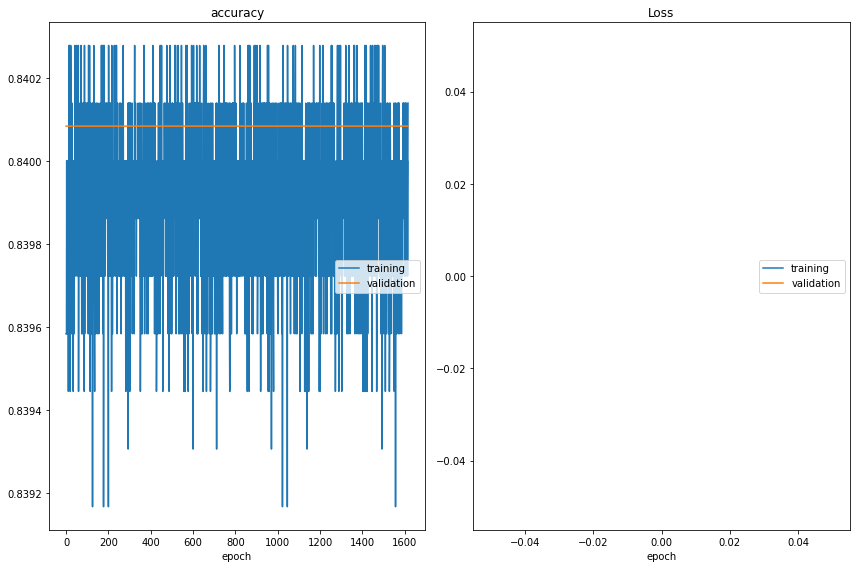

accuracy
	training         	 (min:    0.839, max:    0.840, cur:    0.840)
	validation       	 (min:    0.840, max:    0.840, cur:    0.840)
Loss
	training         	 (min:      nan, max:      nan, cur:      nan)
	validation       	 (min:      nan, max:      nan, cur:      nan)
720/720 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.8401 - val_loss: nan - val_accuracy: 0.8401
Epoch 1617/2000
 84/720 [==>...........................] - ETA: 1s - loss: nan - accuracy: 0.8250

In [ ]:
gIO.history = notFP_model.fit(gIO.getTrainIO(),
              validation_data=(gIO.getTestIO()),
              epochs=2000,
              steps_per_epoch=720,
              validation_steps=1,
              workers=0,
              callbacks=[PlotLossesKerasTF()]
              )

###Predict